In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

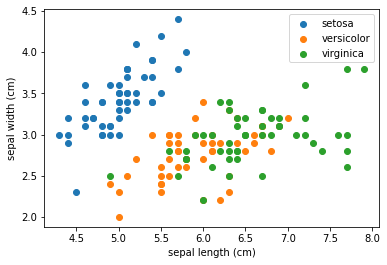

In [4]:
X = iris.data[:, :2]
y = iris.target

plt.scatter(X[y==0,0], X[y==0,1], label=iris.target_names[0])
plt.scatter(X[y==1,0], X[y==1,1], label=iris.target_names[1])
plt.scatter(X[y==2,0], X[y==2,1], label=iris.target_names[2])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
import math

class NaiveBayes:
    def __init__(self):
        self.model = {}

    def mean(self, X):

        return sum(X) / float(len(X))

    def stdev(self, X):

        m = self.mean(X)

        return math.sqrt(sum([pow(x-m, 2) for x in X]) / float(len(X)))

    def gaussian_P(self, x, m, s):

        e = math.exp(-(math.pow(x-m, 2)/(2*math.pow(s, 2))))

        return (1/(math.sqrt(2*math.pi) * s)) * e

    def mean_stdev_j(self, X_train):
        MSj = [(self.mean(j), self.stdev(j)) for j in zip(*X_train)]
        return MSj

    def fit(self, X, y):
        K = list(set(y))
        Xk = {k: [] for k in K}
        for row, k in zip(X, y):
            Xk[k].append(row)

        for k, rows in Xk.items():

            Pk = len(rows) / len(X)

            self.model[k] = (self.mean_stdev_j(rows), Pk)

    def calculate_P(self, X_test):
        P = {}
        for k, (MSj, Pk) in self.model.items():
            P[k] = Pk
            for j in range(len(MSj)):
                mean, stdev = MSj[j]
                P[k] *= self.gaussian_P(X_test[j], mean, stdev)

        return P

    def predict(self, X_test):
        P = self.calculate_P(X_test)
        P = sorted(P.items(), key=lambda x : x[-1])
        k = P[-1][0]
        return k

    def score(self, X_test, y_test):
        right = 0
        for X, y in zip(X_test, y_test):
            k = self.predict(X)
            if k == y:
                right += 1

        return right/float(len(X_test))

In [8]:
model = NaiveBayes()
model.fit(X_train, y_train)
model.predict([4.4, 3.2])

0

In [9]:
model.score(X_test, y_test)


0.7666666666666667

In [11]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7666666666666667

In [12]:
clf.predict([[4.4, 3.2]])


array([0])

In [14]:
from sklearn.naive_bayes import  MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6333333333333333

In [15]:
clf.predict([[4.4, 3.2]])

array([0])

In [16]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.3

In [17]:
clf.predict([[4.4, 3.2]])

array([2])